# 영화 리뷰 분류: 이진 분류 예제

## 1. IMDB 데이터셋

In [2]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

# 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
# 드물게 나타나는 단어는 무시함
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
# train_data와 test_data는 리뷰의 목록
# 각 리뷰는 단어 인덱스의 리스트
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# train_labels와 test_labels는 리뷰의 부정을 나타내는 0과 긍정을 나타내는 1의 리스트
train_labels[0]

1

In [5]:
# 가장 자주 등장하는 단어 1만개로 제한되어 있으므로 단어 인덱스는 9,999를 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()  # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    # 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 2. 데이터 준비(one-hot encoding)

In [9]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. 신경망 모델 만들기

In [13]:
#  모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [14]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 4. 훈련 검증

In [18]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# 훈련하는 동안 발생한 모든 정보가 딕셔너리인 history 속성에 담긴다.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-05-31 20:57:40.016265: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 3s 39ms/step - loss: 0.5000 - binary_accuracy: 0.7879 - val_loss: 0.3779 - val_binary_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2910 - binary_accuracy: 0.9085 - val_loss: 0.2961 - val_binary_accuracy: 0.8911
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2180 - binary_accuracy: 0.9280 - val_loss: 0.2773 - val_binary_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1700 - binary_accuracy: 0.9455 - val_loss: 0.3317 - val_binary_accuracy: 0.8667
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1384 - binary_accuracy: 0.9580 - val_loss: 0.2879 - val_binary_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1169 - binary_accuracy: 0.9641 - val_loss: 0.3186 - val_binary_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0955 -

In [20]:
# history의 속성
# 이 속성들로 훈련과 검증 데이터에 대한 손실과 정확도를 그릴 수 있다.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

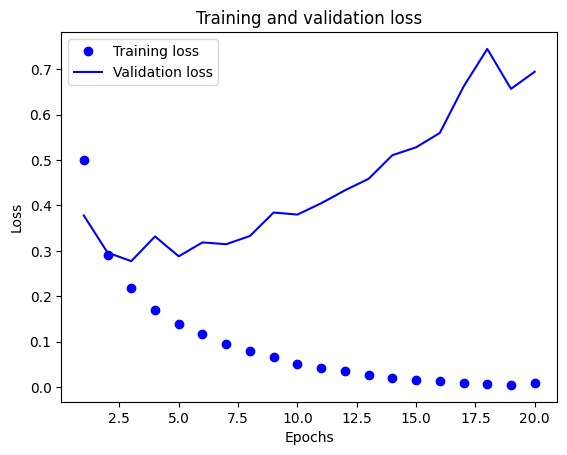

In [25]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')         # bo: 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')    # b: 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

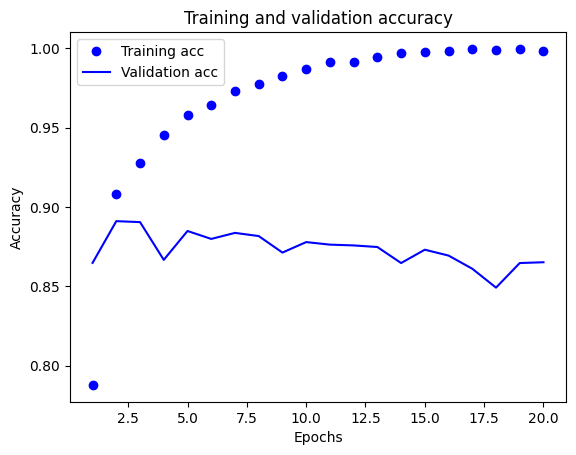

In [27]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4471 - accuracy: 0.8229
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2550 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1969 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.3008 - accuracy: 0.8816


[0.30081936717033386, 0.8816400170326233]

In [34]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.14261043],
       [0.99988055],
       [0.84554815],
       ...,
       [0.10673648],
       [0.06290095],
       [0.43137774]], dtype=float32)